In [130]:
import pandas as pd

url = 'https://raw.githubusercontent.com/VikParuchuri/zero_to_gpt/master/data/clean_weather.csv'
data = pd.read_csv(url)

In [131]:
data.ffill()

,Unnamed: 0,tmax,tmin,rain,tmax_tomorrow
0,1970-01-01,60.0,35.0,0.0,52.0
1,1970-01-02,52.0,39.0,0.0,52.0
2,1970-01-03,52.0,35.0,0.0,53.0
3,1970-01-04,53.0,36.0,0.0,52.0
4,1970-01-05,52.0,35.0,0.0,50.0
...,...,...,...,...,...
13504,2022-11-22,62.0,35.0,0.0,67.0
13505,2022-11-23,67.0,38.0,0.0,66.0
13506,2022-11-24,66.0,41.0,0.0,70.0
13507,2022-11-25,70.0,39.0,0.0,62.0


<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

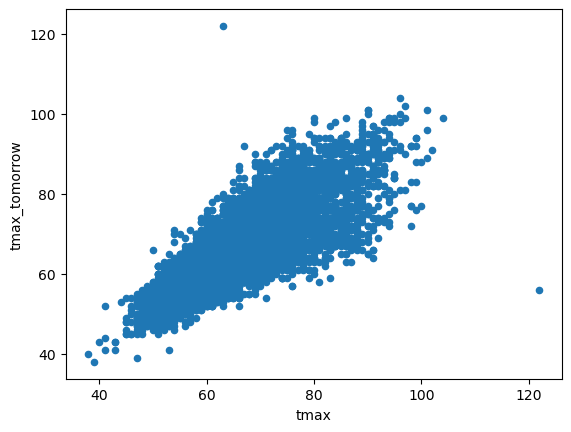

In [88]:
data.plot.scatter("tmax","tmax_tomorrow")

In [89]:
data.corr()

C:\Users\vidur\AppData\Local\Temp\ipykernel_11976\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,tmax,tmin,rain,tmax_tomorrow
tmax,1.000000,0.615134,-0.221703,0.818820
tmin,0.615134,1.000000,-0.018215,0.584958
rain,-0.221703,-0.018215,1.000000,-0.213239
tmax_tomorrow,0.818820,0.584958,-0.213239,1.000000


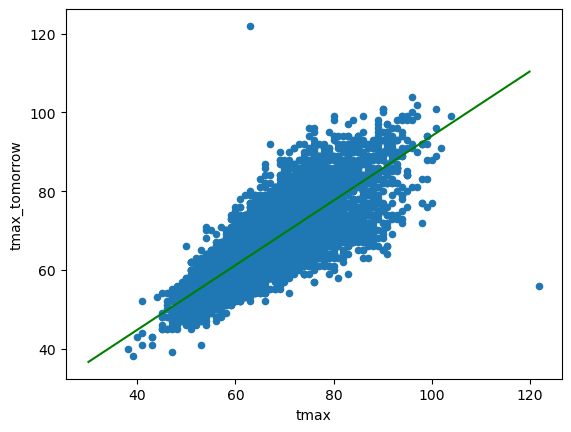

In [90]:
import matplotlib.pyplot as plt
data.plot.scatter("tmax", "tmax_tomorrow")

# Calculate the prediction given our weight and bias
prediction = lambda x, w1=.82, b=11.99: x * w1 + b

# Plot a linear regression line over our data
plt.plot([30, 120], [prediction(30),prediction(120)], 'green')

In [91]:
import numpy as np

def mse(actual, predicted):
    return np.mean((actual-predicted) ** 2)

print(mse(data["tmax_tomorrow"], prediction(data["tmax"])))

22.829737716827278


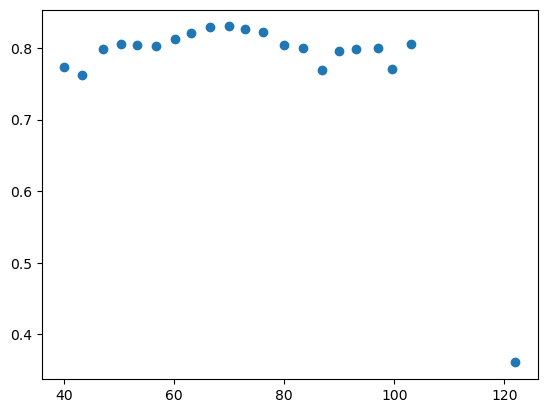

In [92]:
tmax_bins = pd.cut(data["tmax"], 25)


ratios = (data["tmax_tomorrow"] - 11.99 )/ data["tmax"]
binned_ratio = ratios.groupby(tmax_bins).mean()


binned_tmax = data["tmax"].groupby(tmax_bins).mean()

plt.scatter(binned_tmax, binned_ratio)

In [93]:
binned_ratio

tmax
(37.916, 41.36]     0.773904
(41.36, 44.72]      0.762256
(44.72, 48.08]      0.798484
(48.08, 51.44]      0.805470
(51.44, 54.8]       0.803930
(54.8, 58.16]       0.802731
(58.16, 61.52]      0.812692
(61.52, 64.88]      0.821498
(64.88, 68.24]      0.829101
(68.24, 71.6]       0.830006
(71.6, 74.96]       0.825894
(74.96, 78.32]      0.822207
(78.32, 81.68]      0.804168
(81.68, 85.04]      0.800264
(85.04, 88.4]       0.769633
(88.4, 91.76]       0.796350
(91.76, 95.12]      0.798793
(95.12, 98.48]      0.800002
(98.48, 101.84]     0.771119
(101.84, 105.2]     0.805621
(105.2, 108.56]          NaN
(108.56, 111.92]         NaN
(111.92, 115.28]         NaN
(115.28, 118.64]         NaN
(118.64, 122.0]     0.360738
dtype: float64

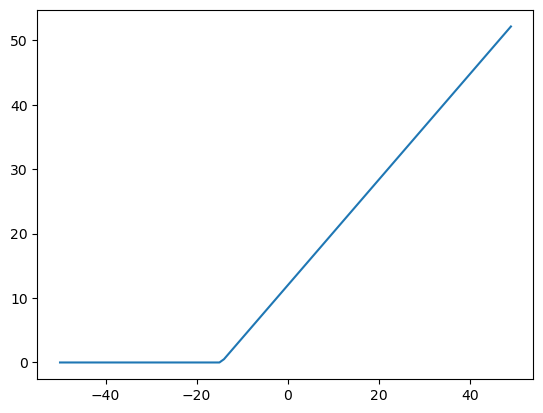

In [94]:
temps = np.arange(-50,50)

plt.plot(temps, np.maximum(0,prediction(temps)))

(0.0, 40.0)

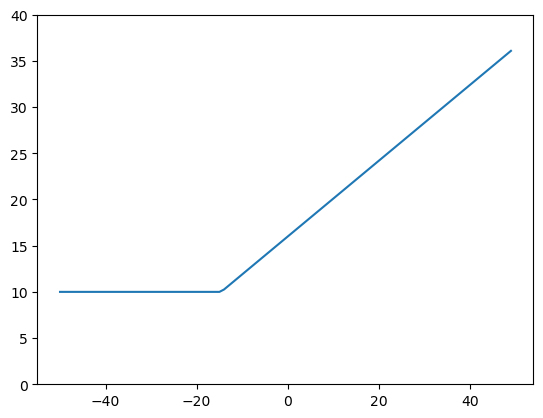

In [95]:
temps = np.arange(-50,50)

layer1 = np.maximum(0,prediction(temps))
layer2 = prediction(layer1, .5, 10)

plt.plot(temps,layer2)
plt.ylim((0,40))

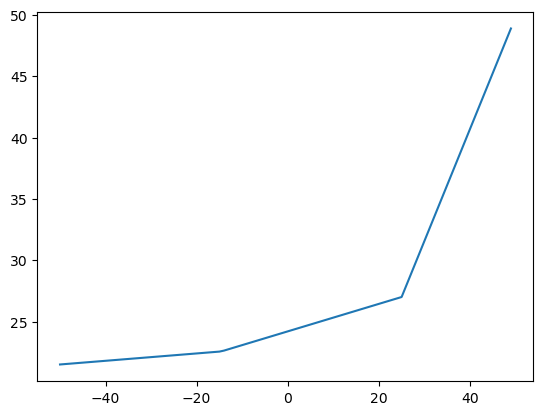

In [96]:
layer1_1 = np.maximum(0,prediction(temps))

layer1_2 = np.maximum(0, prediction(temps, .1, 10))

layer1_3 = np.maximum(0, prediction(temps, 2, -50))

layer2 = layer1_1* .1 + layer1_2* .3 + layer1_3* .4 + 20

plt.plot(temps, layer2)

In [97]:
layer1_2

array([ 5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,
        6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,
        7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,
        8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,
        9.4,  9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4,
       10.5, 10.6, 10.7, 10.8, 10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5,
       11.6, 11.7, 11.8, 11.9, 12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6,
       12.7, 12.8, 12.9, 13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7,
       13.8, 13.9, 14. , 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8,
       14.9])

In [98]:
input = np.array([[80], [90], [100], [-20], [-10]])
input
l1_weights = np.array([[.81,.1]])
l1_bias = np.array([[11.99, 10]])


l1_output = input @ l1_weights + l1_bias

In [99]:
l1_activated = np.maximum(l1_output, 0)

In [100]:
l1_activated

array([[76.79, 18.  ],
       [84.89, 19.  ],
       [92.99, 20.  ],
       [ 0.  ,  8.  ],
       [ 3.89,  9.  ]])

In [101]:
l2_weights = np.array([
    [.5],
    [.2]
])

l2_bias = np.array([[5]])

# This is the output of the layer

output = l1_activated @ l2_weights + l2_bias

output

array([[46.995],
       [51.245],
       [55.495],
       [ 6.6  ],
       [ 8.745]])

In [102]:
tmax = np.array([[80], [90], [100], [-20], [-10]])
tmax_tomorrow = np.array([[83], [89], [95], [-22], [-9]])

In [103]:
tmax_tomorrow

array([[ 83],
       [ 89],
       [ 95],
       [-22],
       [ -9]])

In [104]:
def mse(actual, predicted):
    return(actual-predicted) ** 2

In [105]:
mse(tmax_tomorrow, output)

array([[1296.360025],
       [1425.440025],
       [1560.645025],
       [ 817.96    ],
       [ 314.885025]])

In [106]:
def mse_grad(actual, predicted):
    return predicted - actual

In [107]:
mse_grad(tmax_tomorrow, output)

array([[-36.005],
       [-37.755],
       [-39.505],
       [ 28.6  ],
       [ 17.745]])

In [108]:
output_gradient = mse_grad(tmax_tomorrow, output)

In [109]:
l2_w_gradient = l1_activated.T @ output_gradient
l2_w_gradient

array([[-9574.3878],
       [-1767.03  ]])

In [110]:
from sympy import diff, symbols
    
x,w = symbols('X,W')
sympy_output = x*w
diff(sympy_output, w)

X

In [111]:
l2_b_gradient = np.mean(output_gradient, axis=0)
l2_b_gradient 

array([-13.384])

In [112]:
l2_weights

array([[0.5],
       [0.2]])

In [113]:
lr = 1e-5
l2_bias = l2_bias - l2_b_gradient * lr
l2_weights = l2_weights - l2_w_gradient * lr
l2_weights

array([[0.59574388],
       [0.2176703 ]])

In [114]:
l1_activated_gradient = output_gradient @ l2_weights.T
l1_activated_gradient

array([[-21.44975833,  -7.83721915],
       [-22.49231011,  -8.21814218],
       [-23.5348619 ,  -8.5990652 ],
       [ 17.03827491,   6.22537058],
       [ 10.57147512,   3.86255947]])

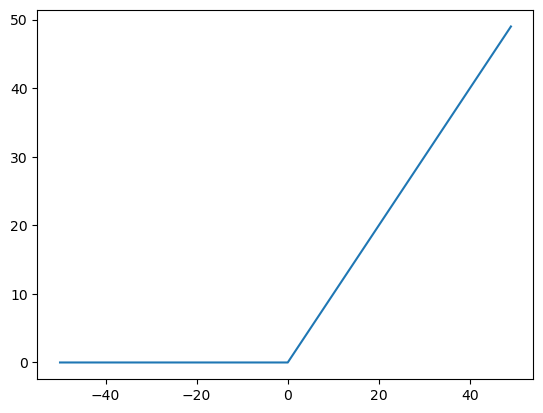

In [115]:
temps = np.arange(-50,50)

plt.plot(temps, np.maximum(0,temps))

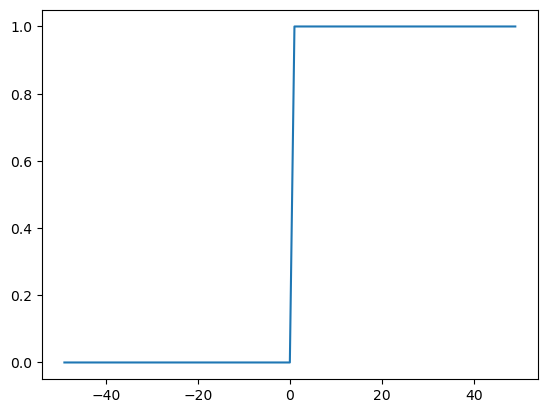

In [116]:
activation = np.maximum(0,temps)

plt.plot(temps[1:], activation[1:] - np.roll(activation, 1)[1:])

In [117]:
l1_output_gradient = l1_activated_gradient * np.heaviside(l1_output,0)
l1_output_gradient

array([[-21.44975833,  -7.83721915],
       [-22.49231011,  -8.21814218],
       [-23.5348619 ,  -8.5990652 ],
       [  0.        ,   6.22537058],
       [ 10.57147512,   3.86255947]])

In [118]:
l1_w_gradient = input.T @ l1_output_gradient
l1_b_gradient = np.mean(l1_output_gradient, axis=0)

l1_weights -= l1_w_gradient*lr
l1_bias -= l1_b_gradient*lr

In [119]:
l1_weights

array([[0.8719949, 0.1238965]])

In [120]:
l1_bias

array([[11.99011381, 10.00002913]])

In [121]:
#AlGO
# Run the network forward pass, and get the output:
# Compute gradient with respect to the outputs of the network. (the mse_grad function)
# For each layer in the network:
# Compute the gradient with respect to the pre-nonlinearity output (if the layer has a nonlinearity)
# Compute the gradient with respect to the weights
# Compute the gradient with respect to the biases
# Compute the gradient with respect to the inputs to the layer
# Update the parameters in the network using gradient descent

In [122]:
import numpy as np
from sklearn.preprocessing import StandardScaler
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

# Scale our data so relu works better
# All temperature values in the original dataset are over 0, so relu won't do much for several epochs
# Scaling will make some of the input data negative
scaler = StandardScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])

split_data = np.split(data, [int(.7 * len(data)), int(.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in
                                                            split_data]

In [123]:
def init_layers(inputs):
    layers = []
    for i in range(1, len(inputs)):
        layers.append([
            np.random.rand(inputs[i-1], inputs[i]) / 5 - .1,
            np.ones((1,inputs[i]))
        ])
    return layers

# This will initialize weights and biases for a 3-layer neural network with 10 units in the first layer, 10 in the second, and 1 in the final
# The first number (3) is our number of input features
layer_conf = [3,10,10,1]

In [124]:
def forward(batch, layers):
    hidden = [batch.copy()]
    for i in range(len(layers)):
        batch = np.matmul(batch, layers[i][0]) + layers[i][1]
        if i < len(layers) - 1:
            batch = np.maximum(batch, 0)
        # Store the forward pass hidden values for use in backprop
        hidden.append(batch.copy())
    return batch, hidden

In [125]:
def mse(actual, predicted):
    return (actual - predicted) ** 2

def mse_grad(actual, predicted):
    return predicted - actual

In [126]:
def backward(layers, hidden, grad, lr):
    for i in range(len(layers)-1, -1, -1):
        if i != len(layers) - 1:
            grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))

        w_grad = hidden[i].T @ grad
        b_grad = np.mean(grad, axis=0)

        layers[i][0] -= w_grad * lr
        layers[i][1] -= b_grad * lr
        
        grad = grad @ layers[i][0].T
    return layers

In [127]:
#Training Loop
from statistics import mean

lr = 1e-6
epochs=10
batch_size = 8

layers = init_layers(layer_conf)

for epoch in range(epochs):
    epoch_loss = []

    for i in range(0, train_x.shape[0], batch_size):
        x_batch = train_x[i:(i+batch_size)]
        y_batch = train_y[i:(i+batch_size)]
        pred, hidden = forward(x_batch, layers)

        loss = mse_grad(y_batch, pred)
        epoch_loss.append(np.mean(loss ** 2))

        layers = backward(layers, hidden, loss, lr)


    valid_preds, _ = forward(valid_x, layers)

    print(f"Epoch: {epoch} Train MSE: {mean(epoch_loss)} Valid MSE: {np.mean(mse(valid_preds,valid_y))}")

Epoch: 0 Train MSE: nan Valid MSE: nan
Epoch: 1 Train MSE: nan Valid MSE: nan
Epoch: 2 Train MSE: nan Valid MSE: nan
Epoch: 3 Train MSE: nan Valid MSE: nan
Epoch: 4 Train MSE: nan Valid MSE: nan
Epoch: 5 Train MSE: nan Valid MSE: nan
Epoch: 6 Train MSE: nan Valid MSE: nan
Epoch: 7 Train MSE: nan Valid MSE: nan
Epoch: 8 Train MSE: nan Valid MSE: nan
Epoch: 9 Train MSE: nan Valid MSE: nan


In [128]:
layers[0]

[array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]),
 array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])]

In [129]:
pred, hidden = forward(test_x, layers)
np.mean(mse(test_y, pred))

nan